# Foundations of Data Science
## Homework 2

Student Name:

Student Netid:
***

### Part 1: Case study (5 Points)
- Read [this article](http://www.nytimes.com/2012/02/19/magazine/shopping-habits.html) in the New York Times.
- Use what we've learned in class and from the book to describe how one could set Target's problem up as a predictive modeling problem, such that they could have gotten the results that they did.  Formulate your solution as a proposed plan using our data science terminology.  Include aspects of the Data Science Workflow that you see as relevant to solving the problem.  Be precise but concise.

Place your answer here!

In [ ]:
"""
1. We first need to look for instances of major changes amongst humans. The frequency of them visiting the store
could drop, while the amount of items they buy might increase. A significant increase in medical goods specifically
related to pregnancy. Birthing individuals could also be planning to buy items that indicate a 'gender reveal'
party (if they're interested). 
2. We also look at food patterns that could suddenly lean towards the conventional "healthy" trend. While this
doesn't specifically indicate pregnancy, it could indicate a superset of it in terms of the health-conscious
crowd. Also, apart from healthy choices, Patterns such as formerly buying a lot of seafood and suddenly not,
could also add to this score.
3. Strategically placing items and marking them as "For Pregnant individuals" could also help. It could add
to the score that people who buy such items are expecting a child. 
4. Further, we send emails and messages where, while including a lot of other irrelevant advertisements, we insert
products and offers targeted at pregnant individuals. Responses to these could be recorded. In these same emails,
or mails, we could also add a straightforward message that Target is offering support and special offers to 
pregnant individuals. While it might not attract everyone, it could make it easier for the small demographic that
actually signs up.
5. After sampling this data, we make sure that we don't have any duplicates so our data is cleaner. 


### Part 2: Exploring data in the command line (4 Points - 1 Point Each)
For this part we will be using the data file located in `"data/loansData.csv"`. This file consists of records that pertain to some loan records in a local bank. There are 15 comma separated columns in this order: 

`CustNUm`, `Amount.Requested`,	`Amount.Funded.By.Investors`,	`Interest.Rate`,	`Loan.Length`,	`Loan.Purpose`,	`Debt.To.Income.Ratio`,	`State`,	`Home.Ownership`,	`Monthly.Income`,	`FICO.Range`,	`Open.CREDIT.Lines`,	`Revolving.CREDIT.Balance`,	`Inquiries.in.the.Last.6.Months`, and	`Employment.Length`. 

These fields contain data of type `int`, `float`, and `string`, and you can also locate a file `"data/loansData_columns.csv"`in the data folder containing all the column names for easy reference.  Answer the following questions using Linux/Unix bash commands. All questions can be answered in one line (sometimes, with pipes)! Some questions will have many possible solutions. Don't forget that in iPython notebooks you must prefix all bash commands with an exclamation point, i.e. `"!command arguments"`.

1\. How many records (lines) are in this file?

In [13]:
# Place your code here
#import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
#from numpy import math

#loansData = pd.read_csv('data/loansData.csv')

#x=loansData.shape[0]
#print(x)
#There are 2499 lines
!wc -l 'data/loansData.csv'

2499 data/loansData.csv


2\. How many unique `State` (the 8th field) are in this file? (hint: consider the 'cut' command and use pipe operator '|')

In [15]:
# Place your code here
#loansDataH = pd.read_csv('data/loansData_columns.csv')
#headers = np.genfromtxt(loansDataH, delimiter=",", dtype=None, encoding=None)
#print(arr)
#loansData2 = pd.read_csv('data/loansData.csv', names=headers)
#print(loansData2['State'].nunique())
#There are 46 states
!cut -d',' -f8 'data/loansData.csv' | sort -u | wc -l

46


3\. Rank all domains by the number of `Loan.Purpose` (the 6th field) they requested in descending order. (hint: consider the 'cut', 'uniq' and 'sort' commands and the pipe operator).

In [21]:
# Place your code here
!cut -d',' -f6 'data/loansData.csv' | sort | uniq -c | sort -nr

   1307 debt_consolidation
    444 credit_card
    201 other
    152 home_improvement
    101 major_purchase
     87 small_business
     50 car
     39 wedding
     30 medical
     29 moving
     21 vacation
     20 house
     15 educational
      4 renewable_energy


4\. List all records which have `FICO.Range` (the 11th field) from 815-819. (hint: this can be done using 'grep')

In [23]:
# Place your code here
!grep '815-819' 'data/loansData.csv'

64884,9000,9000,6.03%,36 months,vacation,5.58%,NJ,MORTGAGE,9583.33,815-819,11,675,0,n/a
55501,8000,8000,6.03%,36 months,debt_consolidation,4.51%,OR,MORTGAGE,3500,815-819,9,6737,0,10+ years
93374,16500,16500,6.03%,36 months,debt_consolidation,22.65%,CA,MORTGAGE,5416.67,815-819,17,14835,0,10+ years
90568,4800,4800,6.62%,36 months,car,10.42%,TX,MORTGAGE,7291.67,815-819,14,0,0,< 1 year
80302,16800,16800,7.90%,60 months,debt_consolidation,3.34%,FL,MORTGAGE,10666.67,815-819,7,4757,0,10+ years
5906,12800,12787.71,8.94%,36 months,debt_consolidation,0.18%,AZ,MORTGAGE,2833.33,815-819,7,306,0,4 years


### Part 3: Dealing with data Pythonically (16 Points)

In [7]:
# You might find these packages useful. You may import any others you want!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1\. (1 Point) Load the data set `"data/ads_dataset.tsv"` and load it into a Python Pandas data frame called `ads`.

In [25]:
# Place your code here
ads = pd.read_csv('data/ads_dataset.tsv', sep='\t')

2\. (4 Points) Write a Python function called `getDfSummary()` that does the following:
- Takes as input a data frame
- For each variable in the data frame calculates the following features:
  - `number_nan` to count the number of missing not-a-number values
  - Ignoring missing, NA, and Null values:
    - `number_distinct` to count the number of distinct values a variable can take on
    - `mean`, `max`, `min`, `std` (standard deviation), and `25%`, `50%`, `75%` to correspond to the appropriate percentiles
- All of these new features should be loaded in a new data frame. Each row of the data frame should be a variable from the input data frame, and the columns should be the new summary features.
- Returns this new data frame containing all of the summary information

Hint: The pandas `describe()` [(manual page)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) method returns a useful series of values that can be used here.

In [100]:
def getDfSummary(input_data):
    # Place your code here
    #i = input_data.shape[1]
    #output_data=pd.DataFrame(columns=['number_nan', 'number_distinct', 'mean', 'max', 'min', 'std', '25%', '50%', '75%'], index=range(i))
    #print(input_data.columns.values)
    #x=input_data.columns.values
    #output_data.set_axis(x,axis=0,inplace=True)
    nantable= pd.DataFrame(input_data.isnull().sum(), columns=['number_nan'])
    distable= pd.DataFrame(input_data.nunique(axis=0), columns=['number_distinct'])
    desc=input_data.describe().T
    merge1=nantable.join(distable)
    output_data=merge1.join(desc)
    return output_data
getDfSummary(ads)

,number_nan,number_distinct,count,mean,std,min,25%,50%,75%,max
is_video_user,0,2,54584.0,0.042632,0.202027,0.0000,0.0,0.0,0.000000,1.00000
video_freq,52257,10,2327.0,1.240653,0.782228,1.0000,1.0,1.0,1.000000,15.00000
call_freq,0,64,54584.0,1.852777,2.921820,0.0000,1.0,1.0,2.000000,84.00000
video_interval,0,121,54584.0,2.570533,14.162418,0.0000,0.0,0.0,0.000000,120.00000
call_interval,0,5886,54584.0,5.825610,17.595442,0.0000,0.0,0.0,0.104167,184.91670
expected_video_time,0,134,54584.0,-0.494174,8.411089,-78.0000,0.0,0.0,0.000000,55.00000
expected_call_time,0,15135,54584.0,-10.210786,31.879722,-187.6156,0.0,0.0,0.000000,91.40192
last_bill,0,189,54584.0,64.729335,53.476658,0.0000,18.0,51.0,105.000000,188.00000
next_bill,0,189,54584.0,64.729335,53.476658,0.0000,18.0,51.0,105.000000,188.00000
multiple_video,0,2,54584.0,0.021563,0.145253,0.0000,0.0,0.0,0.000000,1.00000


3\. (1 Point) How long does it take for your `getDfSummary()` function to work on your `ads` data frame? Show us the results below.

Hint: `%timeit getDfSummary(ads)`

In [102]:
# Place your code here
%timeit getDfSummary(ads)

52.1 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


4\. (2 Points) Using the results returned from `getDfSummary()`, which fields, if any, contain missing `NaN` values?

In [103]:
# Place your code here
# video_frequency field contains missing NaN values
new_data = getDfSummary(ads)
numofNan=new_data.isnull().sum()
print(numofNan)

number_nan         0
number_distinct    0
count              0
mean               0
std                0
min                0
25%                0
50%                0
75%                0
max                0
dtype: int64


5\. (4 Points) For the fields with missing values, does it look like the data is missing at random? Are there any other fields that correlate perfectly, or predict that the data is missing? If missing, what should the data value be?

Hint: create another data frame that has just the records with a missing value. Get a summary of this data frame using `getDfSummary()` and compare the differences. Do some feature distributions change dramatically?

In [112]:
# Place your code and response here
miss_data = ads[ads.isnull().any(axis=1)]
getDfSummary(miss_data)
#video_interval when 0, is giving NaN on video_freq. Missing value should've been 0.

,number_nan,number_distinct,count,mean,std,min,25%,50%,75%,max
is_video_user,0,1,52257.0,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.00000
video_freq,52257,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call_freq,0,48,52257.0,1.651549,2.147955,1.0000,1.0,1.0,2.000000,84.00000
video_interval,0,1,52257.0,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.00000
call_interval,0,5112,52257.0,5.686388,17.623555,0.0000,0.0,0.0,0.041667,184.91670
expected_video_time,0,1,52257.0,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.00000
expected_call_time,0,13351,52257.0,-9.669298,31.239030,-187.6156,0.0,0.0,0.000000,91.40192
last_bill,0,189,52257.0,65.741317,53.484622,0.0000,19.0,52.0,106.000000,188.00000
next_bill,0,189,52257.0,65.741317,53.484622,0.0000,19.0,52.0,106.000000,188.00000
multiple_video,0,1,52257.0,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.00000


6\. (2 Points) Which variables are binary?

In [147]:
# Place your code here
def is_binary(series, allow_na=False):
    if allow_na:
        series.dropna(inplace=True)
    print([w for w in ads if (len(ads[w].value_counts())>0)&all(ads[w].value_counts().index.isin([0, 1]))])
    return 
is_binary(new_data)

['is_video_user', 'multiple_video', 'multiple_carrier', 'is_churn']


7\. (0.5 Point) Let's take a deeper look into one of the features, the `num_texts`, which stands for the number of text messages. Let's try and understand the distribution of this field. We can do this using the hist() method and matplotlib. Draw a histogram graph of `num_texts` from the dataframe `ads`, set the title of the graph as `'Histogram of Number of Texts'`.

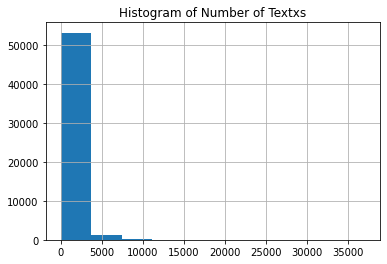

In [148]:
# Place your code here
plt.figure()
inc = ads['num_texts']
h = inc.hist()
plt.title('Histogram of Number of Textxs')
plt.show()

8\. (1.5 Point) How would you characterize the shape of this distribution? Is there anything we can do to the texts variable to make the distribution more bell curved? 

Hint: Let's create a new column in the dataframe called `'log_num_texts'` and print a histogram `'Histogram of Log(Num Texts)'` of it. What might be some advantages of making such a transformation?

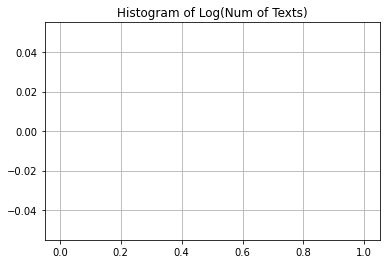

In [155]:
# Place your code and response here
loggtable= pd.DataFrame(np.log10(ads['num_texts']), columns=['log_num_texts'])
fintable=new_data.join(loggtable)
plt.figure()
inc = fintable['log_num_texts']
h = inc.hist()
plt.title('Histogram of Log(Num of Texts)')
plt.show()

End of Homework2